### Sumário

- Estados, Recompensas e ações
- Maximizando as recompensas
- Funçao valor e policy (politica de decisões)

In [46]:
import numpy as np
import time
import cliff
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Estados, Recompensas e ações

Para inicinarmos a discussção sobre programação dinâmica vamos esclarecer alguns conceitos basicos como estados, recompensas e açoes.

- **State**: Conjunto de informações suficientes para definir exatamente o sistema.
- **Recompensas**: Ganho ou prejuizo obtido ao transitar de um estado para outro ou de estar em um estado e tomar um determinada ação.
- **Ações**: Decição tomada dentre as possívels para provovar uma mudança de estado.

Para ilustrar esses conceitos vamos usar o seguinte exemplo de um jogo bem simples, onde o objetico é navegar em um mapa 2D evitando determinados espaços.


-------------------------------------------------
| P | 0 | 0 | 0 | 0 | * | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| * | * | * | 0 | 0 | * | 0 | 0 | * | * | 0 | 0 | 
-------------------------------------------------
| * | * | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| * | * | * | * | * | * | * | * | * | * | 0 | G | 
-------------------------------------------------


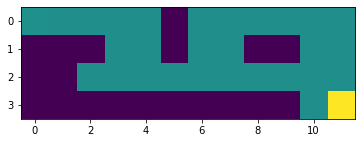

In [47]:
ROWS  = 4
COLS  = 12
START = (0, 0)
GOAL  = (3, 11)

OBSTACLE = [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3,8), (2, 1), (1, 1),
            (1, 0), (1, 2), (2, 0), (3, 0), (0, 5), (1, 8), (3, 9), (1, 9), (1, 5)]

cliff_game = cliff.Cliff(START, GOAL, ROWS, COLS, OBSTACLE)
cliff_game.show()


rewards = np.zeros((ROWS, COLS))
for i in range(0, ROWS):
    for j in range(0, COLS):
        rewards[i, j] = cliff_game.getReward((i,j))
        
plt.imshow(rewards/np.max(rewards))


O jogo consiste em começar nas coordenadas (0,0) e ir  ate o ponto em amarelo (3, 11). Os pontos azul escuro determinam pontos de passagem onde ha um custo maior para se mover, de modo que o melhor caminho será obitdo evitando esses pontos.

Neste jogo o estado pode ser definido simplesmente pela coordenada do estado presente ou seja os estados possíveis são:

s $\epsilon$ S = {(i, j) in [[0 , 3], [0, 11]]}

As ações possívels podem ser:

a $\epsilon$ A = {"up", "down", "left", "right"}

Com exceções nas bordas, pois não é possível sair para forar do mapa.

As recompensas pare este jogo são definidas como:

$R(S_t, a_t) = R(S_t, S_{t+1}) = R(S_t)$

Ou seja, as recompesas só dependem do estado em que estamos no instante $t$ e são dados por:

- 0 - Se estamos no estado inicial
- -2 - Se estamos num estado comum (indicado por 0)
- -1000 Se estamos num estado marcado por *
- +1000 - Se estamos nos estado final (indicado por G)






### Escolhendo uma políica - maximizando recompensas

Na proximação dinâmica agimos sobre o sistema de acordo com uma politica, ou regra de controle.  Encontrar uma política consiste em encontrar uma mapeamente entre estado e ação para cada estado possível.

$\pi(S_t) = a_{\pi}$,  para cada $S_t$ $\epsilon$ S

Normalmente não estamos interessados em qualquer politica, mas sim na politica que maximiza nossas recompensas ao longo do caminho. Esse objetivo pode ser expresso através da seguinte equação:

$ J(\pi(S)) = \Sigma_{0}^{T}\gamma^tR(S_t, a_\pi)$

$max\{J(S)\} = max\{\Sigma_{0}^{T}\gamma^tR(S_t, a_t)\}$

Com isso, temos o problema de otimização de encontrar a politica que maximiza a função custo acima dada as restrições de transição de estados do sistema, a função recompensa e a ações possíveis.


Exemplo, podemos avaliar a função custo politica que não ótima onde damos 11 passos para a esquerda e 3 para baixo. Esta política nos leva ao objetivo final do trajeto, porém não otimiza a função custo ao passar pelo espaço marcado por *.

In [58]:
cliff_game.reset()
total_reward = 0
for i in range(0, 11):
    _, reward = cliff_game.transition("right")
    total_reward += reward
    cliff_game.show()
    time.sleep(0.25)
    clear_output(True)
for i in range(0, 3):
    _, reward = cliff_game.transition("down")
    total_reward += reward
    cliff_game.show()
    time.sleep(0.25)
    if i != 2:
      clear_output(True)

print("Total Reward: {}".format(reward))

-------------------------------------------------
| S | 0 | 0 | 0 | 0 | * | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| * | * | * | 0 | 0 | * | 0 | 0 | * | * | 0 | 0 | 
-------------------------------------------------
| * | * | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
-------------------------------------------------
| * | * | * | * | * | * | * | * | * | * | 0 | P | 
-------------------------------------------------
Total Reward: 1000


### Funçao valor e a equação de Bellman

Podemos simplificar o problema de otimização acima pensando na decisão a ser tomada a cada passo. Para iso, definimos a função valor como:

$V(S_t) = max\{\Sigma_{t}^{T}\gamma^tR(S_t)\}$

Ou seja, a sometória das recompensas do estado atual até o estado final seguindo uma determinada política, a partir dessa definição podemos relacionar o a função valor de um estado no instante $t$ com o instante $t+1$.

$V_t(S_t) = max(R(S_t) + \gamma V_{t+1}(S_{t+1}))$ - Bellman equation

E política otíma pode ser encontrar a partir da função valor através de:

$\pi^* = argmax_{a_t}{(R(S_t) + \gamma V_{t+1}(S_{t+1}))}$


Vemos na equação que a função valor de um estado depende da função valor do estado futuro, o que dificulta a solução do problema de otimização e cálculo da política otíma. 


Nas próximas partes veremos diferentes formas de resolver esse problema para o exemplo apresentado e algumas variantes.